### Compare models trained on cloud

In [3]:
import os, sys, json, copy, random, pickle, time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# set to my fork with fix on server
# sys.path.insert(0, '../../../myfastai')
# set to dev-head on local
sys.path.insert(0, '../../../fastaif')
import fastai
print(fastai.__version__)

from fastai.vision import *
from fastai.utils.mem import  gpu_mem_get_free_no_cache

%reload_ext autoreload
%autoreload 2

from modules.ap3data import build_data
from modules.ap3graph import *
from modules.miscutils import ( scp_from_gcloud
                               ,move_file_obj
                               ,fastai_version
                              )

from modules.modeleval import ( calc_loss
                               ,err_to_np
                               ,FullModel
                               ,Residuals
                              )

1.0.53.dev0


##### Copy down the models

In [24]:
scp_from_gcloud('new-models/apfit2*', 'new-models/')

running popen and waiting...
new files in dest (new-models/)
apfit2-1.csv
apfit2-1.pth
apfit2-2.csv
apfit2-2.pth
apfit2-3.csv
apfit2-3.pth
apfit2-4.csv
apfit2-4.pth


##### Build the model-objects & get predictions 

In [4]:
# the two datasets for apfit2-X models

data_small = build_data(batch_size=16, 
                        size=(216, 324), 
                        valid_pct=0.2,
                        )
data_large = build_data(batch_size=16, 
                        size=(288, 432), 
                        valid_pct=0.2,
                        )

('bad num workers',)
('bad num workers',)


In [3]:
learn_1 = cnn_learner(data_large, models.resnet50)
learn_1.model_dir = '../../../fastai/course-v3/nbs/custom2/new-models'
_ = learn_1.load('apfit2-1')

history_1 = pd.read_csv('new-models/apfit2-1.csv')
history_1

,epoch,train_loss,valid_loss,time
0,0,0.787084,0.197442,02:11
1,1,0.157009,0.040867,02:05
2,2,0.051705,0.035955,02:04
3,3,0.044647,0.032503,02:04
4,4,0.034784,0.020355,02:04
5,5,0.027509,0.018908,02:04
6,6,0.024515,0.012921,02:04
7,7,0.020152,0.010891,02:05
8,8,0.019492,0.010172,02:04
9,9,0.018892,0.010272,02:04


In [5]:
preds = learn_1.get_preds(with_loss=True)
with open('misc-data/preds-apfit2-1.pickle', 'wb') as fn:
    pickle.dump(preds, fn)

##### Build the rest of predictions

In [14]:
import time

In [12]:
learn_2 = cnn_learner(data_large, models.resnet34)
learn_2.model_dir = '../../../fastai/course-v3/nbs/custom2/new-models'
_ = learn_2.load('apfit2-2')

learn_3 = cnn_learner(data_small, models.resnet50)
learn_3.model_dir = '../../../fastai/course-v3/nbs/custom2/new-models'
_ = learn_3.load('apfit2-3')

learn_4 = cnn_learner(data_small, models.resnet34)
learn_4.model_dir = '../../../fastai/course-v3/nbs/custom2/new-models'
_ = learn_4.load('apfit2-4')

In [16]:
t0 = time.time()
preds = learn_2.get_preds(with_loss=True)
with open('misc-data/preds-apfit2-2.pickle', 'wb') as fn:
    pickle.dump(preds, fn)
print(time.time() - t0)

t0 = time.time()
preds = learn_3.get_preds(with_loss=True)
with open('misc-data/preds-apfit2-3.pickle', 'wb') as fn:
    pickle.dump(preds, fn)
print(time.time() - t0)

t0 = time.time()
preds = learn_4.get_preds(with_loss=True)
with open('misc-data/preds-apfit2-4.pickle', 'wb') as fn:
    pickle.dump(preds, fn)
print(time.time() - t0)

239.13594603538513


##### Verify pickling works

In [6]:
with open('misc-data/preds-apfit2-1.pickle', 'rb') as fn:
    loaded_preds = pickle.load(fn)

In [9]:
preds[0][:3], preds[1][:3], preds[2][:3]

(tensor([[ 0.0061, -0.0993,  0.0151,  0.0378,  0.3364,  0.0322,  0.3136, -0.1120],
         [-0.0296, -0.2512, -0.0417,  0.0267,  0.4469,  0.0407,  0.4778, -0.2471],
         [ 0.0985, -0.1245,  0.0475,  0.0748,  0.4880,  0.0968,  0.5135, -0.1032]]),
 tensor([[[ 0.0023, -0.1065],
          [-0.0185,  0.0648],
          [ 0.3241,  0.0679],
          [ 0.3218, -0.1034]],
 
         [[ 0.0532, -0.3086],
          [ 0.0463, -0.0355],
          [ 0.4630, -0.0355],
          [ 0.4676, -0.3102]],
 
         [[ 0.0718, -0.1235],
          [ 0.0347,  0.1343],
          [ 0.4769,  0.1451],
          [ 0.4815, -0.1188]]]),
 tensor([1.4344e-05, 5.2166e-05, 1.1334e-03]))

In [8]:
loaded_preds[0][:3], loaded_preds[1][:3], loaded_preds[2][:3]

(tensor([[ 0.0061, -0.0993,  0.0151,  0.0378,  0.3364,  0.0322,  0.3136, -0.1120],
         [-0.0296, -0.2512, -0.0417,  0.0267,  0.4469,  0.0407,  0.4778, -0.2471],
         [ 0.0985, -0.1245,  0.0475,  0.0748,  0.4880,  0.0968,  0.5135, -0.1032]]),
 tensor([[[ 0.0023, -0.1065],
          [-0.0185,  0.0648],
          [ 0.3241,  0.0679],
          [ 0.3218, -0.1034]],
 
         [[ 0.0532, -0.3086],
          [ 0.0463, -0.0355],
          [ 0.4630, -0.0355],
          [ 0.4676, -0.3102]],
 
         [[ 0.0718, -0.1235],
          [ 0.0347,  0.1343],
          [ 0.4769,  0.1451],
          [ 0.4815, -0.1188]]]),
 tensor([1.4344e-05, 5.2166e-05, 1.1334e-03]))

##### Match Error section

In [5]:
history_2 = pd.read_csv('new-models/apfit2-2.csv')
history_2

,epoch,train_loss,valid_loss,time
0,0,0.780102,0.162783,01:31
1,1,0.161491,0.046588,01:31
2,2,0.054535,0.035219,01:32
3,3,0.047526,0.028836,01:31
4,4,0.039283,0.023253,01:31
5,5,0.033630,0.019634,01:33
6,6,0.029332,0.017184,01:32
7,7,0.027924,0.014971,01:31
8,8,0.025270,0.014369,01:32
9,9,0.025823,0.014592,01:32


In [92]:
list(history_2['valid_loss'])[-1]

0.014591999999999999

In [98]:
data_large.y

PointsLabelList (4662 items)
ImagePoints (864, 1296),ImagePoints (864, 1296),ImagePoints (864, 1296),ImagePoints (864, 1296),ImagePoints (864, 1296)
Path: /mnt/c/users/wsutt/desktop/files/alphapilot/Data_Training/Data_Training

In [101]:
from modules.ap3data import get_truth_df

In [102]:
df = get_truth_df()

In [107]:
type(df)

pandas.core.frame.DataFrame

In [108]:
df.columns[:3]

Index(['IMG_9622.JPG', 'IMG_9925.JPG', 'IMG_6733.JPG'], dtype='object')

In [94]:
data_large.y_first

AttributeError: y_first

In [6]:
with open('misc-data/preds-apfit2-2.pickle', 'rb') as fn:
    loaded_preds = pickle.load(fn)

In [7]:
preds = loaded_preds

In [8]:
preds[0][:3]

tensor([[ 0.0178, -0.0630, -0.0041, -0.0657,  0.3125, -0.0553,  0.3392, -0.0549],
        [ 0.0896, -0.1690,  0.0777,  0.0260,  0.4802,  0.0455,  0.4618, -0.1551],
        [ 0.0487, -0.2742,  0.0365,  0.0285,  0.4583,  0.0011,  0.4343, -0.3018]])

In [13]:
from modules.modeleval import calc_loss

In [19]:
# chaching!
num_items = len(data_small.valid_dl.items)

calc_loss(preds[0], preds[1]) / (num_items * 8)

tensor(0.0146)

In [20]:
sum(preds[2]) / (num_items * 8)

tensor(0.0146)

So calc_loss combines predicted with actuals [0] vs [1] and gets the same validation error as seen in history.

And calc_loss also returns the same as sum of [3] so fastai and I manually agree. Therefore we undertand error.

Note: each of these methods returns SSE and need to be divided by num of validation-items * num-coords(8).

In [ ]:
# build indiivduals error to match?
loss_each_ = torch.nn.MSELoss(reduction='none')
syn_err_each = [loss_each_(_pred, _target.flatten()) 
                for _pred, _target in zip(preds[0], preds[1]) ]

In [44]:
from modules.modeleval import err_to_np

In [45]:
err_tbl = err_to_np(preds[2])

In [51]:
# sum loss for each coord - very weird!
indv_loss_sums = [sum(err_tbl[:,i])
                  for i in range(8)]
indv_loss_sums

[5.207012468735467,
 23.50456286953755,
 17.157897220417805,
 22.04316633896602,
 2.750082645389238,
 28.02280421157483,
 16.454314039630745,
 20.85787806429434]

In [59]:
[sum(err_tbl[i, :]) for i in range(3)]

[0.03732754538941663, 0.05652594028651947, 0.0912238775295009]

In [61]:
# sum loss (of all coords) for each validation item
valid_loss = [sum(err_tbl[i, :]) for i in range(num_items)]
valid_loss[:3]

[0.03732754538941663, 0.05652594028651947, 0.0912238775295009]

In [72]:
sort_vl = sorted(enumerate(valid_loss)
                 ,key=lambda x: x[1]
                 ,reverse=True
                )
sort_vl[:10], sort_vl[-1:-10:-1]

([(204, 1.4858190706863752),
  (831, 1.3238011356443167),
  (172, 1.2595390447322643),
  (552, 1.2555800603031901),
  (1047, 1.2235223183456583),
  (1029, 0.9584984991233796),
  (657, 0.9292561262845993),
  (1119, 0.9261985879456915),
  (1087, 0.8967457621874928),
  (358, 0.8910683772992343)],
 [(1049, 0.0012852116583417228),
  (78, 0.0013807017385261133),
  (502, 0.0014350696565088583),
  (1019, 0.0028300613503233762),
  (310, 0.0029994552210155234),
  (79, 0.003103912305959966),
  (829, 0.003232814727539335),
  (278, 0.003354516082254122),
  (1042, 0.003469684728770517)])

In [73]:
from matplotlib import pyplot as plt

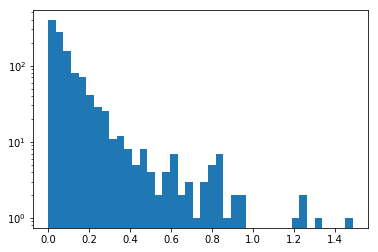

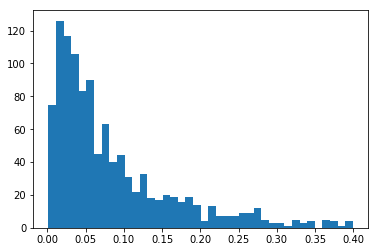

In [80]:
_ = plt.hist(valid_loss, bins=40, log=True )
plt.show()
_ = plt.hist([e for e in valid_loss if e < 0.4], bins=40)

In [86]:
# how much of model err is impacted by outliers?
# how many outliers are there?
outlier_cutoff = [0.0, 0.4, 0.7, 1.0]
ret = []

sse_total = sum(valid_loss)

for _cutoff in outlier_cutoff:
    _losses = [e for e in valid_loss if e > _cutoff]
    _n = len(_losses)
    ret.append(
        (_cutoff, _n, round(sum(_losses) / sse_total, 3))
    )
    
print(['val','n  ', 'sse_pct'], *ret, sep='\n')

['val', 'n  ', 'sse_pct']
(0.0, 1165, 1.0)
(0.4, 61, 0.315)
(0.7, 26, 0.176)
(1.0, 5, 0.048)


##### Old stuff ------

In [2]:
#big1 : 0.011 valid err model
data_size288_bs8 = build_data(size=(288, 432), batch_size=8)
learn_both = cnn_learner(data_size288_bs8, models.resnet34)
_ = learn_both.load('ap4-big-1')

In [3]:
#resnet50 - 0.0033 valid-err model
data_size288_bs32 = build_data(size=(288, 432), batch_size=16)
learn_50 = cnn_learner(data_size288_bs32, models.resnet50)
_ = learn_50.load('ap4-resnet50-1')

In [4]:
datasets = [data_size288_bs8, data_size288_bs32]
learners = [learn_both, learn_50]

##### Build prediction object and save them

In [5]:
preds_50 = learn_50.get_preds(with_loss=True)
with open('preds_50.pickle', 'wb') as fn:
    pickle.dump(preds_50, fn)

In [6]:
preds_both = learn_both.get_preds(with_loss=True)
with open('preds_both.pickle', 'wb') as fn:
    pickle.dump(preds_both, fn)

##### Sort prediction object by most greivous

##### Visually Compare

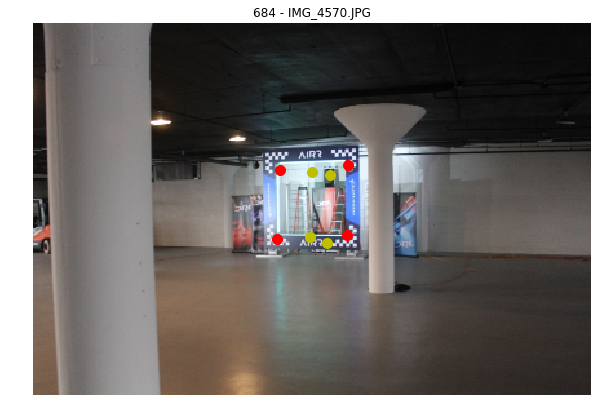

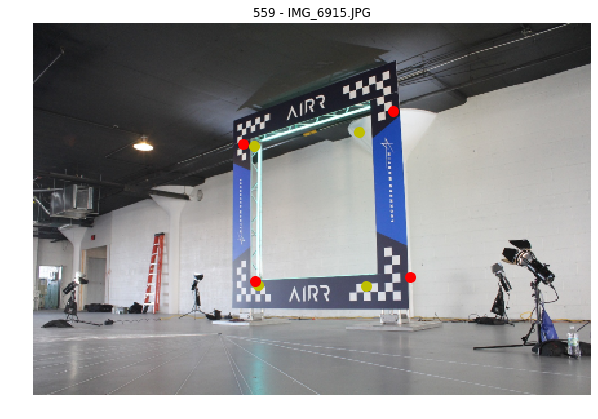

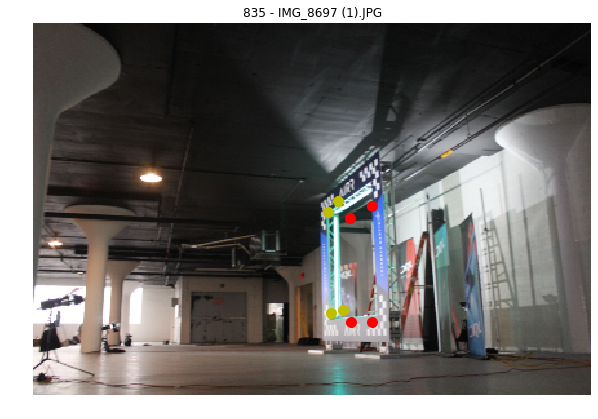

In [221]:
np.random.seed(0)

for _ in range(3):
    pred_compare(datasets=datasets, 
                 learners=learners,
                 size=(288, 432), 
                 i=None, 
                 b_print=True,
                 b_one_image=True
                )